In [1]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

import wrangle

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1. Load `zillow` data

In [2]:
df = wrangle.wrangle_zillow_data()

In [3]:
df.head()

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county
0,4,2.0,3633,296425,2005,6941.39,LA
1,3,4.0,1620,847770,2011,10244.94,LA
2,3,2.0,2077,646760,1926,7924.68,LA
3,3,1.0,1244,169471,1950,2532.88,LA
4,3,2.0,1300,233266,1950,3110.99,LA


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `taxvaluedollarcnt` using only `calculatedfinishedsqft`.

In [4]:
ols_model = LinearRegression()

In [5]:
ols_model.fit(df[['sqft']], df['property_value'])

df['yhat'] = ols_model.predict(df[['sqft']])

In [6]:
df.head()

,bedrooms,bathrooms,sqft,property_value,year_built,property_tax,county,yhat
0,4,2.0,3633,296425,2005,6941.39,LA,889029.755816
1,3,4.0,1620,847770,2011,10244.94,LA,362053.322425
2,3,2.0,2077,646760,1926,7924.68,LA,481689.800348
3,3,1.0,1244,169471,1950,2532.88,LA,263621.559407
4,3,2.0,1300,233266,1950,3110.99,LA,278281.609218


3. Plot the residuals for the linear regression model that you made.

<Axes: xlabel='sqft'>

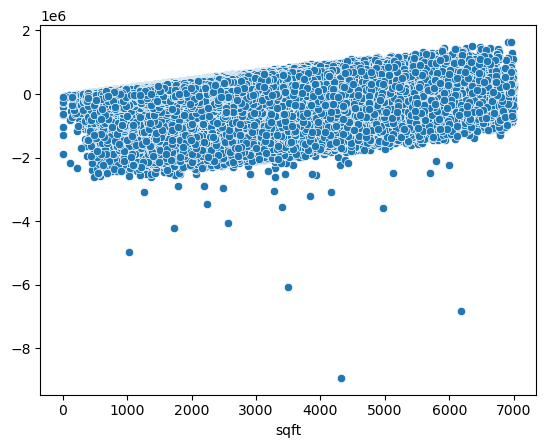

In [7]:
sns.scatterplot(data = df, x = df['sqft'], y = df['yhat']-df['property_value'])

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
residuals = df['yhat'] - df['property_value']
residuals_baseline = df['property_value'] - df['property_value'].mean()
SSE = np.sum(residuals ** 2)
ESS = np.sum((df['yhat'] - df['property_value'].mean()) ** 2)
TSS = np.sum(residuals_baseline ** 2)
MSE = SSE / len(df)
RMSE = MSE ** .5
R2 = ESS/TSS

print(f'SSE: {SSE}\nESS: {ESS}\nTSS: {TSS}\nMSE: {MSE}\nRMSE: {RMSE}\nR2: {R2}')

SSE: 1.6297985264993414e+17
ESS: 9.131346385083022e+16
TSS: 2.542933165007645e+17
MSE: 77954793377.48805
RMSE: 279203.8563084114
R2: 0.35908715615243353


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).5. 

In [13]:
df['baseline'] = df['property_value'].mean()

In [28]:
residuals_baseline = df['property_value'] - df['property_value'].mean()
SSE_bl = np.sum(residuals_baseline ** 2)
ESS_bl = np.sum((df['property_value'].mean() - df['property_value'].mean()) ** 2)
TSS_bl = np.sum(residuals_baseline ** 2)
MSE_bl = SSE_bl / len(df)
RMSE_bl = MSE_bl ** .5
R2_bl = ESS_bl/TSS_bl

print('Baseline:')
print(f'SSE: {SSE_bl}\nESS: {ESS_bl}\nTSS: {TSS_bl}\nMSE: {MSE_bl}\nRMSE: {RMSE_bl}\nR2: {R2_bl}')

Baseline:
SSE: 2.542933165007645e+17
ESS: 0.0
TSS: 2.542933165007645e+17
MSE: 121630880276.178
RMSE: 348756.19030517293
R2: 0.0


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [18]:
print(f'Our model SSE is {SSE}, compared to our baseline SSE, {SSE_bl}.\
 Thus, our model performs better than baseline')

Our model SSE is 1.6297985264993414e+17, compared to our baseline SSE, 2.542933165007645e+17. Thus, our model performs better than baseline


7. What is the amount of variance explained in your model?
- **36%**

8. Is your model better than the baseline model?

- **Yes**

9. Create a file named evaluate.py that contains the following functions.

- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [19]:
y = df['property_value']
yhat = df['yhat']
x = df['sqft']

In [20]:
def plot_residuals(x, y, yhat):
    sns.scatterplot(x = x, y = yhat-y)

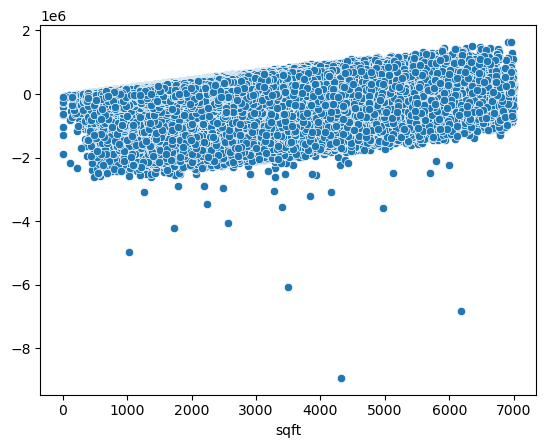

In [21]:
plot_residuals(x, y, yhat)

In [24]:
def regression_errors(y, yhat):
    residuals = yhat - y
    residuals_baseline = y - y.mean()
    
    SSE = np.sum(residuals ** 2)
    ESS = np.sum((yhat - y.mean()) ** 2)
    TSS = np.sum(residuals_baseline ** 2)
    MSE = SSE / len(y)
    RMSE = MSE ** .5
    
    return SSE, ESS, TSS, MSE, RMSE

In [25]:
regression_errors(y, yhat)

(1.6297985264993414e+17,
 9.131346385083022e+16,
 2.542933165007645e+17,
 77954793377.48805,
 279203.8563084114)

In [29]:
def baseline_mean_errors(y):
    residuals_baseline = y - y.mean()
    SSE_bl = np.sum(residuals_baseline ** 2)
    ESS_bl = np.sum((y.mean() - y.mean()) ** 2)
    TSS_bl = np.sum(residuals_baseline ** 2)
    MSE_bl = SSE_bl / len(y)
    RMSE_bl = MSE_bl ** .5
    R2_bl = ESS_bl/TSS_bl
    
    return SSE_bl, ESS_bl, TSS_bl, MSE_bl, RMSE_bl

In [30]:
baseline_mean_errors(y)

(2.542933165007645e+17,
 0.0,
 2.542933165007645e+17,
 121630880276.178,
 348756.19030517293)

In [37]:
def better_than_baseline(y, yhat):
    residuals = yhat - y
    residuals_baseline = y - y.mean()
    
    SSE = np.sum(residuals ** 2)
    SSE_bl = np.sum(residuals_baseline ** 2)
    
    if SSE < SSE_bl:
        return True
    else:
        return False

In [38]:
better_than_baseline(y, yhat)

True